# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census_und`.

In [2]:
us_census_files = glob.glob("states*.csv")
 
df_list = []
for filename in us_census_files:
    df_list.append(pd.read_csv(filename, index_col=0))

us_census = pd.concat(df_list)

# index_col=0 added after playing around with the data to remove unnamed column

3. Look at the `.columns` and the `.dtypes` of the `us_census_und` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [3]:
print(us_census.columns)
print(us_census.dtypes)

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop'],
      dtype='object')
State        object
TotalPop      int64
Hispanic     object
White        object
Black        object
Native       object
Asian        object
Pacific      object
Income       object
GenderPop    object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [4]:
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,"$43,296.36",2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,"$70,354.74",384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,"$54,207.82",3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,"$41,935.63",1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,"$67,264.78",19087135M_19334329F


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [5]:
us_census['Income'] = us_census['Income'].replace('[\$,]', '', regex=True)
us_census['Income'] = pd.to_numeric(us_census['Income'])
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [6]:
gender_split = us_census['GenderPop'].str.split('_')
us_census['Men'] = gender_split.str.get(0)
us_census['Women'] = gender_split.str.get(1)
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093M,2489527F
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160M,349215F
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088M,3342840F
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913M,1506295F
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135M,19334329F


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [7]:
us_census['Men'] = pd.to_numeric(us_census['Men'].replace('[M]', '', regex=True))
us_census['Women'] = pd.to_numeric(us_census['Women'].replace('[F]', '', regex=True))
us_census.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%,43296.36,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%,70354.74,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%,54207.82,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%,41935.63,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%,67264.78,19087135M_19334329F,19087135,19334329.0


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

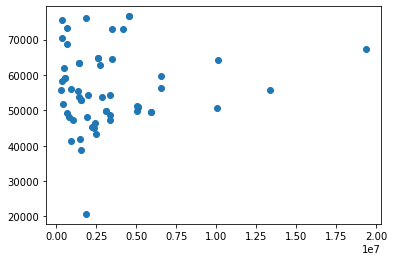

In [8]:
plt.scatter(us_census.Women, us_census.Income) 
plt.show()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [9]:
us_census[['Women']].head(25)

,Women
0,2489527.0
1,349215.0
2,3342840.0
3,1506295.0
4,19334329.0
5,2630239.0
0,2630239.0
1,1841615.0
2,478041.0
3,340810.0


In [10]:
us_census = us_census.fillna(value={"Women": (us_census['TotalPop'] - us_census['Men'])})
us_census[['Women']].head(20)

,Women
0,2489527.0
1,349215.0
2,3342840.0
3,1506295.0
4,19334329.0
5,2630239.0
0,2630239.0
1,1841615.0
2,478041.0
3,340810.0


10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [11]:
# This did not work without dropping the unnamed column with index_col=0
us_census.duplicated().value_counts()

False    51
True      9
dtype: int64

In [12]:
us_census.nunique()

State        51
TotalPop     51
Hispanic     50
White        51
Black        50
Native       39
Asian        49
Pacific      18
Income       51
GenderPop    51
Men          51
Women        51
dtype: int64

In [13]:
# not sure what the nunique results mean
# start by checking 'State'
us_census['State'].duplicated().value_counts()

False    51
True      9
Name: State, dtype: int64

In [14]:
us_census['State'].value_counts().head(10)
# Is it possible to drop the unnamed column
# yes, see second script

Missouri        2
Utah            2
New Jersey      2
Maryland        2
Ohio            2
Iowa            2
Georgia         2
Rhode Island    2
Colorado        2
Texas           1
Name: State, dtype: int64

In [15]:
us_census[us_census['State'] == 'Missouri']

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
5,Missouri,6045448,4.04%,77.51%,14.12%,0.36%,1.62%,0.10%,49763.99,2964003M_3081445F,2964003,3081445.0
0,Missouri,6045448,4.04%,77.51%,14.12%,0.36%,1.62%,0.10%,49763.99,2964003M_3081445F,2964003,3081445.0


In [16]:
us_census[us_census['State'] == 'Utah']

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
5,Utah,2903379,13.47%,79.41%,1.02%,1.08%,2.20%,0.83%,63488.92,1459229M_1444150F,1459229,1444150.0
0,Utah,2903379,13.47%,79.41%,1.02%,1.08%,2.20%,0.83%,63488.92,1459229M_1444150F,1459229,1444150.0


In [17]:
us_census[us_census['State'] == 'Texas']

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
4,Texas,26538614,38.05%,44.69%,11.65%,0.26%,3.67%,0.07%,55874.52,13171316M_13367298F,13171316,13367298.0


11. Drop those duplicates using the `.drop_duplicates()` function.

In [18]:
# It looks like the same info was in two different csv files
us_census_und = us_census.drop_duplicates()
us_census_und.duplicated().value_counts()

False    51
dtype: int64

In [19]:
us_census_und[us_census_und['State'] == 'Missouri']

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
5,Missouri,6045448,4.04%,77.51%,14.12%,0.36%,1.62%,0.10%,49763.99,2964003M_3081445F,2964003,3081445.0


12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

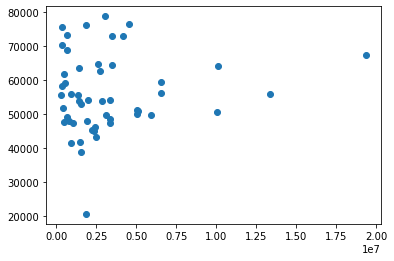

In [20]:
plt.scatter(us_census_und.Women, us_census_und.Income) 
plt.show()

In [21]:
# I'd also like to check for null values!
us_census_und.isnull().value_counts()

State  TotalPop  Hispanic  White  Black  Native  Asian  Pacific  Income  GenderPop  Men    Women
False  False     False     False  False  False   False  False    False   False      False  False    47
                                                        True     False   False      False  False     4
dtype: int64

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [22]:
us_census_und.columns

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')

14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [23]:
# As we've seen above, there are null values in the 'Pacific' column
us_census_und.Pacific.isnull().value_counts()

False    47
True      4
Name: Pacific, dtype: int64

In [24]:
cols_to_check = ['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']
us_census_und[cols_to_check].head()

,Hispanic,White,Black,Native,Asian,Pacific
0,3.75%,61.88%,31.25%,0.45%,1.05%,0.03%
1,5.91%,60.91%,2.85%,16.39%,5.45%,1.06%
2,29.57%,57.12%,3.85%,4.36%,2.88%,0.17%
3,6.22%,71.14%,18.97%,0.52%,1.14%,0.15%
4,37.29%,40.22%,5.68%,0.41%,13.05%,0.35%


In [ ]:
# This throws an error: "arg must be a list, tuple, 1-d array, or Series" , but works.
# us_census_und = us_census_und_und.replace('\%','', regex=True)
# us_census_und = pd.to_numeric(us_census_und)
# us_census_und.head()

In [27]:
# Either of these works

# us_census_und[cols_to_check] = us_census_und[cols_to_check].replace({'\%':''}, regex=True)
# us_census_und[cols_to_check] = pd.to_numeric(us_census_und[cols_to_check])

us_census_und[cols_to_check] = us_census_und[cols_to_check].replace({'\%':''}, regex=True).astype(float)

# don't understand the correction

C:\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [29]:
us_census_und.head()

,State,TotalPop,Hispanic,White,Black,Native,Asian,Pacific,Income,GenderPop,Men,Women
0,Alabama,4830620,3.75,61.88,31.25,0.45,1.05,0.03,43296.36,2341093M_2489527F,2341093,2489527.0
1,Alaska,733375,5.91,60.91,2.85,16.39,5.45,1.06,70354.74,384160M_349215F,384160,349215.0
2,Arizona,6641928,29.57,57.12,3.85,4.36,2.88,0.17,54207.82,3299088M_3342840F,3299088,3342840.0
3,Arkansas,2958208,6.22,71.14,18.97,0.52,1.14,0.15,41935.63,1451913M_1506295F,1451913,1506295.0
4,California,38421464,37.29,40.22,5.68,0.41,13.05,0.35,67264.78,19087135M_19334329F,19087135,19334329.0


In [30]:
# Filling in the nan's with something that makes sense

us_census_und = us_census_und.fillna(value={'Pacific': 100 - (us_census_und['Hispanic'] + us_census_und['White'] + us_census_und['Black'] + 
                                                      us_census_und['Native'] + us_census_und['Asian'])})


In [31]:
# Check for nan's again
us_census_und.Pacific.isnull().value_counts()

False    51
Name: Pacific, dtype: int64

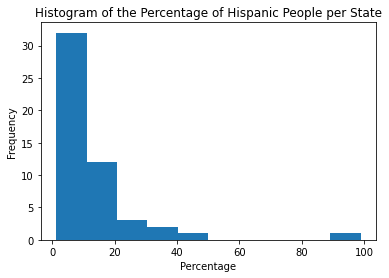

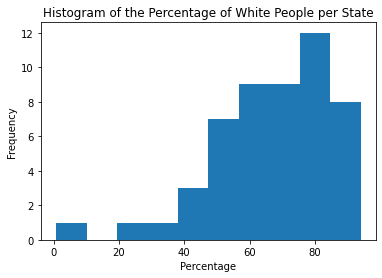

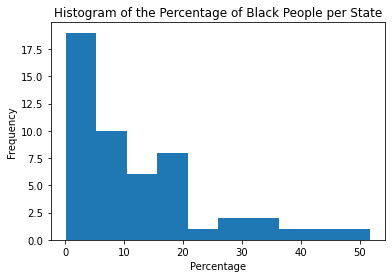

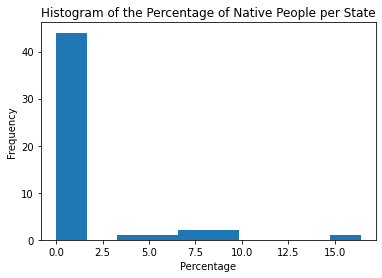

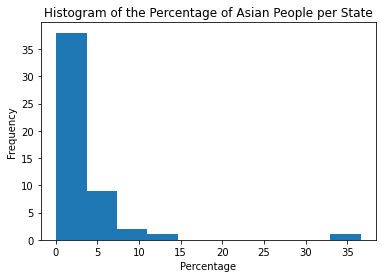

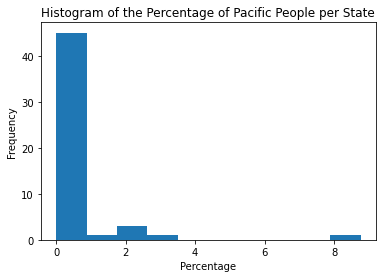

In [32]:
for race in us_census_und[cols_to_check]:
    plt.hist(us_census_und[race])
    plt.title("Histogram of the Percentage of {} People per State".format(race))
    plt.xlabel("Percentage")
    plt.ylabel("Frequency")
    plt.show()

## Get Creative

15. Phew. You've definitely impressed your boss on your first day of work.

    But is there a way you really convey the power of pandas and Python over the drudgery of `csv` and Excel?
    
    Try to make some more interesting graphs to show your boss, and the world! You may need to clean the data even more to do it, or the cleaning you have already done may give you the ease of manipulation you've been searching for.

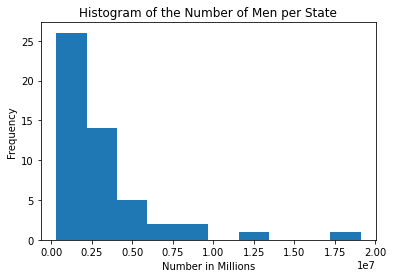

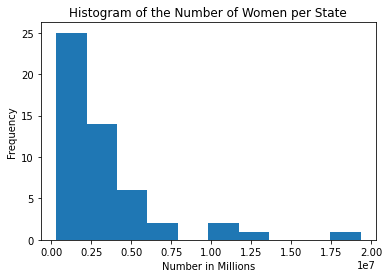

In [33]:
for person in ['Men', 'Women']:
    plt.hist(us_census_und[person])
    plt.title("Histogram of the Number of {} per State".format(person))
    plt.xlabel("Number in Millions")
    plt.ylabel("Frequency")
    plt.show()

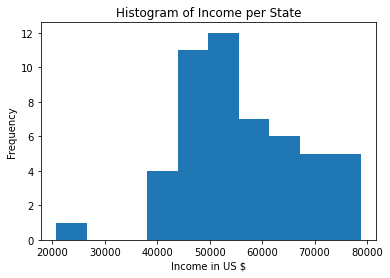

In [34]:
plt.hist(us_census_und['Income'])
plt.title("Histogram of Income per State")
plt.xlabel("Income in US $")
plt.ylabel("Frequency")
plt.show()

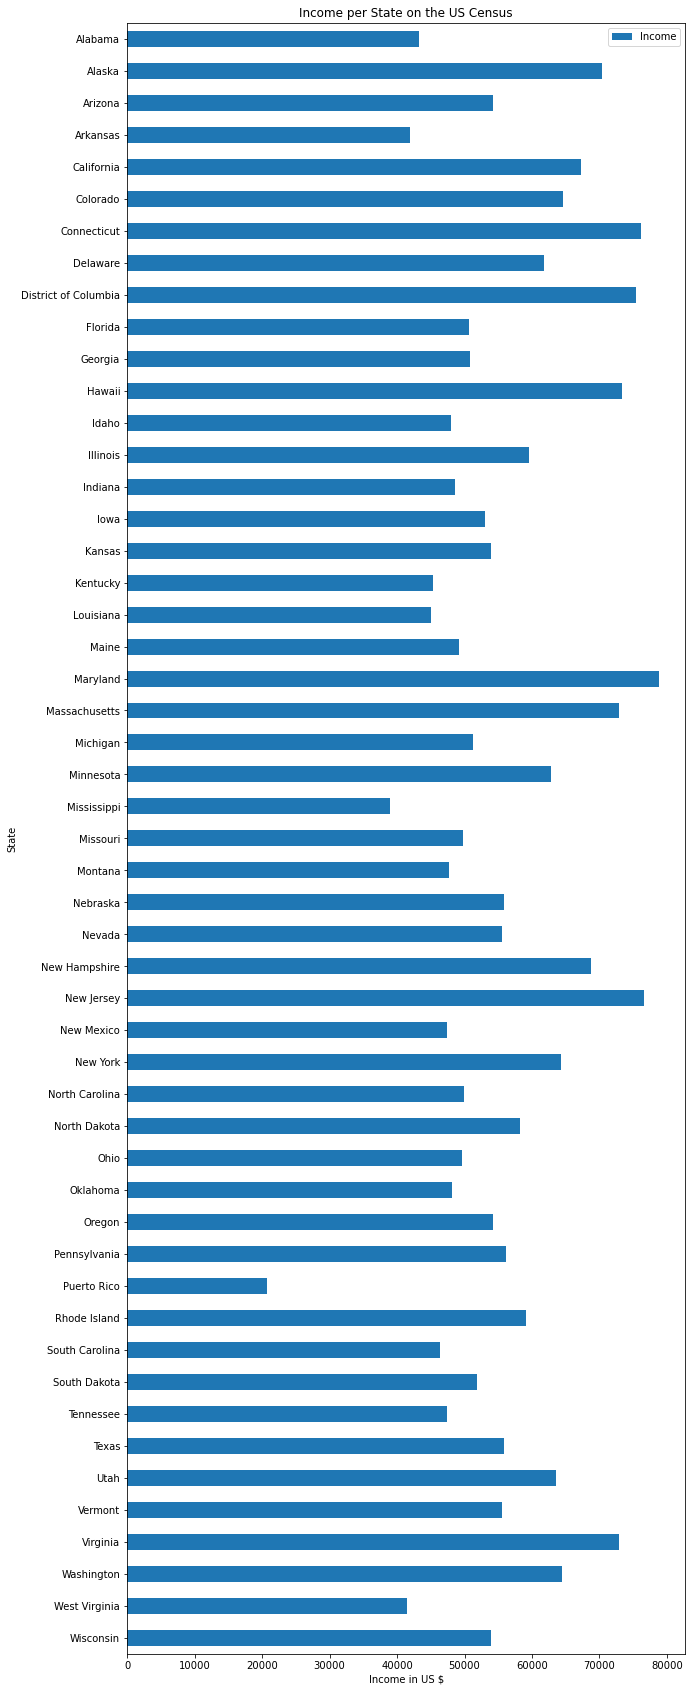

In [46]:
ax = us_census_und.plot.barh(x='State', y='Income', figsize=(10,30))
ax.invert_yaxis()
plt.ylabel("State")
plt.xlabel("Income in US $")
plt.title("Income per State on the US Census")
plt.show()